# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [394]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [395]:
# leer conjuntos de datos en los DataFrames
orders_df = pd.read_csv('instacart_orders.csv', sep=';')
products_df = pd.read_csv('products.csv', sep=';')
aisles_df = pd.read_csv('aisles.csv', sep=';')
departments_df = pd.read_csv('departments.csv', sep=';')
order_products_df = pd.read_csv('order_products.csv', sep=';')

In [396]:
# mostrar información del DataFrame
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [397]:
# mostrar información del DataFrame
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [398]:
# mostrar información del DataFrame
aisles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [399]:
# mostrar información del DataFrame
departments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [400]:
# mostrar información del DataFrame
order_products_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Empezamos descargando los archivos y dejarlos en la carpeta donde tenemos la carpeta principal de proyectos.
Importamos las librerias para hacer más rápido el proceso y así poder leer el conjunto de datos de cada archivo.
Por último vemos la información de cada archivo para saber los datos requeridos


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

Primero vamos a corregir los tipos de datos, principalmente que las columnas ID sean int

Identificaremos los valores ausentes utilizando la función isna() y contandolos con sum()

Eliminaremos los valores duplicados con la función dropna()

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [401]:
# Revisa si hay pedidos duplicados
duplicados = orders_df.duplicated()
print(duplicados)
print(duplicados.sum())


0         False
1         False
2         False
3         False
4         False
          ...  
478962    False
478963    False
478964    False
478965    False
478966    False
Length: 478967, dtype: bool
15


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Si hay pedidos duplicados, tenemos en total 15 pedidos duplicados

In [402]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
pedidos_miercoles_2am = orders_df[(orders_df['order_hour_of_day'] == 2) & (orders_df['order_dow'] == 3)]
print(pedidos_miercoles_2am)


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?

Estas son todas las filas de orders_df donde:

order_dow == 3(osea, Miércoles) y order_hour_of_day == 2(Se hizo a las 2:00 AM)

In [403]:
# Elimina los pedidos duplicados
orders_df = orders_df.drop_duplicates()

In [404]:
# Vuelve a verificar si hay filas duplicadas
print(orders_df.duplicated())
print(orders_df.duplicated().sum())


0         False
1         False
2         False
3         False
4         False
          ...  
478962    False
478963    False
478964    False
478965    False
478966    False
Length: 478952, dtype: bool
0


In [405]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(orders_df['order_id'].duplicated())

0         False
1         False
2         False
3         False
4         False
          ...  
478962    False
478963    False
478964    False
478965    False
478966    False
Name: order_id, Length: 478952, dtype: bool


Describe brevemente tus hallazgos y lo que hiciste con ellos

Si soy honesto tuve problemas para hallar el order_dow porque me salía como error, entonces decidí imprimir las columnas y me aparecían las columnas separadas con ;, entonces modifiqué el archivo al leerlo y le puse sep=';'
Con eso solucioné el error y realicé el pedido del miercoles a las 2 AM como pueden ver en los bloques anteriores.

Eliminé los duplicados tanto de orders_df como de order_df['order_id'] y el resultado fué el mismo.

### `products` data frame

In [406]:
# Verifica si hay filas totalmente duplicadas
print(products_df.duplicated().sum())

0


In [407]:
# Revisa únicamente si hay ID de productos duplicados
print(products_df['product_id'].duplicated())
print(products_df['product_id'].duplicated().sum())


0        False
1        False
2        False
3        False
4        False
         ...  
49689    False
49690    False
49691    False
49692    False
49693    False
Name: product_id, Length: 49694, dtype: bool
0


In [408]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
uppercase_product_names = products_df['product_name'].str.upper()
print(uppercase_product_names.duplicated())
print(uppercase_product_names.duplicated().sum())

0        False
1        False
2        False
3        False
4        False
         ...  
49689     True
49690     True
49691     True
49692     True
49693     True
Name: product_name, Length: 49694, dtype: bool
1361


In [409]:
# Revisa si hay nombres duplicados de productos no faltantes
print(products_df['product_name'].notna().duplicated())
print(products_df['product_name'].notna().duplicated().sum())


0        False
1         True
2         True
3         True
4         True
         ...  
49689     True
49690     True
49691     True
49692     True
49693     True
Name: product_name, Length: 49694, dtype: bool
49692


Describe brevemente tus hallazgos y lo que hiciste con ellos.

El DataFrame de products contiene 49,694 filas con 4 columnas: product_id, product_name, aisle_id y department_id.

La columna product_name tiene algunos valores faltantes (NaN) con 1361, mientras que las demás columnas están completas.

### `departments` data frame

In [410]:
# Revisa si hay filas totalmente duplicadas
print(departments_df.duplicated())
print(departments_df.duplicated().sum())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool
0


In [411]:
# Revisa únicamente si hay IDs duplicadas de departamentos
print(departments_df['department_id'].duplicated())
print(departments_df['department_id'].duplicated().sum())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
Name: department_id, dtype: bool
0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `aisles` data frame

In [412]:
# Revisa si hay filas totalmente duplicadas
print(aisles_df.duplicated())
print(aisles_df.duplicated().sum())


0      False
1      False
2      False
3      False
4      False
       ...  
129    False
130    False
131    False
132    False
133    False
Length: 134, dtype: bool
0


In [413]:
# Revisa únicamente si hay IDs duplicadas de pasillos
print(aisles_df['aisle_id'].duplicated())
print(aisles_df['aisle_id'].duplicated().sum())

0      False
1      False
2      False
3      False
4      False
       ...  
129    False
130    False
131    False
132    False
133    False
Name: aisle_id, Length: 134, dtype: bool
0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

El DataFrame aisles_df no contiene registros duplicados completos, lo que sugiere que cada combinación de valores (por ejemplo, aisle_id y aisle) es única. Esto es una buena señal de calidad de datos y estructura bien normalizada.

### `order_products` data frame

In [414]:
# Revisa si hay filas totalmente duplicadas
print(order_products_df.duplicated())
print(order_products_df.duplicated().sum())


0          False
1          False
2          False
3          False
4          False
           ...  
4545002    False
4545003    False
4545004    False
4545005    False
4545006    False
Length: 4545007, dtype: bool
0


In [415]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(order_products_df.duplicated(subset=['order_id', 'product_id']))
print(order_products_df.duplicated(subset=['order_id', 'product_id']).sum())


0          False
1          False
2          False
3          False
4          False
           ...  
4545002    False
4545003    False
4545004    False
4545005    False
4545006    False
Length: 4545007, dtype: bool
0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

El DataFrame de order_products no tiene filas duplicadas.

Para verificar si hubo otra fila duplicada engañosa utilicé las columnas order_id y product_id y no tiene filas duplicadas

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [416]:
# Encuentra los valores ausentes en la columna 'product_name'
print(products_df['product_name'].isna())
print(products_df['product_name'].isna().sum())

0        False
1        False
2        False
3        False
4        False
         ...  
49689    False
49690    False
49691    False
49692    False
49693    False
Name: product_name, Length: 49694, dtype: bool
1258


Describe brevemente cuáles son tus hallazgos.

Al aplicar .isna() y .sum(), encontré que la columna 'product_name' contiene 1,258 valores faltantes (NaN) de un total de 49,694 filas.

In [417]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
productos_sin_nombre = products_df[products_df['product_name'].isna()]
pasillos_unicos = productos_sin_nombre['aisle_id'].unique()
print(pasillos_unicos)

[100]


Describe brevemente cuáles son tus hallazgos.

Si .unique() devuelve solo [100], eso confirma que todos los productos sin nombre pertenecen solo a ese pasillo.

In [418]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
productos_sin_nombre_departamento = products_df[products_df['product_name'].isna()]
departamentos_unicos = productos_sin_nombre_departamento['department_id'].unique()
print(departamentos_unicos)


[21]


Describe brevemente cuáles son tus hallazgos.

Si .unique() devuelve solo [21], eso confirma que todos los productos sin nombre pertenecen solo a ese departamento.

In [419]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
pasillo_100 = aisles_df[aisles_df['aisle_id'] == 100]
print(pasillo_100)
departamento_21 = departments_df[departments_df['department_id'] == 21]
print(departamento_21)


    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos.
aisle_id = 100
Su nombre es "missing", lo que sugiere que este pasillo agrupa productos con información incompleta o desconocida.
department_id = 21
Su nombre también es "missing", indicando que estos productos pertenecen a un departamento sin categoría definida.

In [420]:
# Completa los nombres de productos ausentes con 'Unknown'
products_df['product_name'].fillna('Unknown', inplace=True)
print(products_df['product_name'])

0                               Chocolate Sandwich Cookies
1                                         All-Seasons Salt
2                     Robust Golden Unsweetened Oolong Tea
3        Smart Ones Classic Favorites Mini Rigatoni Wit...
4                                Green Chile Anytime Sauce
                               ...                        
49689                        HIGH PERFORMANCE ENERGY DRINK
49690                        ORIGINAL PANCAKE & WAFFLE MIX
49691      ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692                               SPRING WATER BODY WASH
49693                              BURRITO- STEAK & CHEESE
Name: product_name, Length: 49694, dtype: object


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Simplemente utilizamos el método fillna('Uknown') para rellenar los valores ausentes

### `orders` data frame

In [421]:
# Encuentra los valores ausentes
print(orders_df.isna())
print(orders_df.isna().sum())

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0          False    False         False      False              False   
1          False    False         False      False              False   
2          False    False         False      False              False   
3          False    False         False      False              False   
4          False    False         False      False              False   
...          ...      ...           ...        ...                ...   
478962     False    False         False      False              False   
478963     False    False         False      False              False   
478964     False    False         False      False              False   
478965     False    False         False      False              False   
478966     False    False         False      False              False   

        days_since_prior_order  
0                        False  
1                        False  
2                       

In [422]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
primer_pedido = orders_df[orders_df['order_number'] == 1]
print(primer_pedido.isna())


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28         False    False         False      False              False   
96         False    False         False      False              False   
100        False    False         False      False              False   
103        False    False         False      False              False   
104        False    False         False      False              False   
...          ...      ...           ...        ...                ...   
478895     False    False         False      False              False   
478896     False    False         False      False              False   
478922     False    False         False      False              False   
478926     False    False         False      False              False   
478945     False    False         False      False              False   

        days_since_prior_order  
28                        True  
96                        True  
100                     

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Todos los NaN están en pedidos con order_number == 1, es decir, el primer pedido del cliente.

Esta columna indica cuántos días pasaron desde el pedido anterior del cliente. Por lo tanto:

Es normal que esté vacío (NaN) para el primer pedido de cada usuario, ya que no hay pedido anterior para calcular esa diferencia.

### `order_products` data frame

In [423]:
# Encuentra los valores ausentes
print(order_products_df.isna())
print(order_products_df.isna().sum())

         order_id  product_id  add_to_cart_order  reordered
0           False       False              False      False
1           False       False              False      False
2           False       False              False      False
3           False       False              False      False
4           False       False              False      False
...           ...         ...                ...        ...
4545002     False       False              False      False
4545003     False       False              False      False
4545004     False       False              False      False
4545005     False       False              False      False
4545006     False       False              False      False

[4545007 rows x 4 columns]
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [424]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(order_products_df['add_to_cart_order'].min())
print(order_products_df['add_to_cart_order'].max())


1.0
64.0


Describe brevemente cuáles son tus hallazgos.

La columna add_to_cart_order tiene 836 valores faltantes (NaN).

Rango de add_to_cart_order:
Mínimo: 1.0
Máximo: 64.0

Esto indica que hay pedidos con hasta 64 productos distintos, y esta columna registra el orden en que se agregó cada producto al carrito.

In [425]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
print(order_products_df[order_products_df['add_to_cart_order'].isna()]['order_id'])

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [426]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# No. El resultado muestra que varios pedidos con NaN en add_to_cart_order tienen menos de 64 
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
order_products_missing = order_products_df[order_products_df['add_to_cart_order'].isna()]
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
missing_grouped = order_products_missing.groupby('order_id')['product_id'].count()
print(missing_grouped)


order_id
9310        1
61355      63
102236     31
129627      5
165801      6
           ..
2999801     6
3125735    22
3308010    51
3347453     7
3383594     5
Name: product_id, Length: 70, dtype: int64


Describe brevemente cuáles son tus hallazgos.

No todos los pedidos con valores ausentes tienen más de 64 productos.
Al contrario, los datos ausentes se presentan en pedidos de diferentes tamaños, desde 1 hasta más de 60 productos. Esto descarta que el problema esté directamente relacionado con un límite como 64

In [427]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products_df['add_to_cart_order'].fillna(999, inplace=True)
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].astype(int)
print(order_products_df['add_to_cart_order'])


0          17
1           1
2           1
3          35
4           5
           ..
4545002    12
4545003     9
4545004     4
4545005     8
4545006     9
Name: add_to_cart_order, Length: 4545007, dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Reemplazé los valores faltantes en add_to_cart_order con el número 999.

Convertí la columna de float a int, ya que ya no contenía NaN

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Se identificaron 836 valores ausentes (NaN) en la columna add_to_cart_order, que indica el orden en que los productos fueron agregados al carrito.

Esos valores estaban repartidos en 70 pedidos distintos, con cantidades variables de productos por pedido (desde 1 hasta 63).

El valor máximo en esa columna para los pedidos completos era 64, pero los pedidos con datos faltantes no necesariamente tenían más de 64 productos.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [428]:
print(sorted(orders_df['order_hour_of_day'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [429]:
print(sorted(orders_df['order_dow'].unique()))

[0, 1, 2, 3, 4, 5, 6]


Escribe aquí tus conclusiones

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

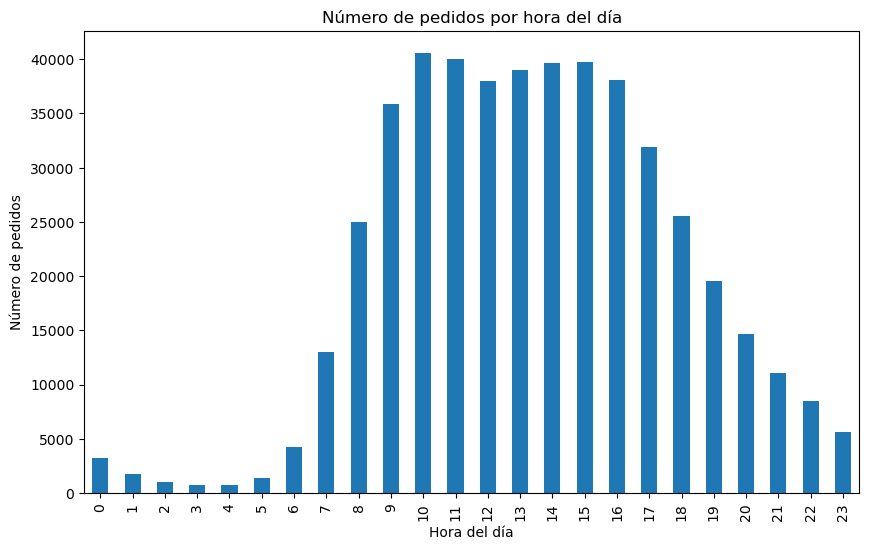

In [430]:
pedidos_por_hora = orders_df['order_hour_of_day'].value_counts().sort_index()
pedidos_por_hora.plot(kind='bar', title='Número de pedidos por hora del día',figsize=(10, 6), xlabel='Hora del día', ylabel='Número de pedidos')
plt.show()

Escribe aquí tus conclusiones

Pico de actividad entre las 9:00 a.m. y 16:00 (4:00 p.m.):

Las horas con mayor número de pedidos se encuentran entre las 9:00 a.m. y las 4:00 p.m.

El punto más alto está alrededor de las 10:00 a.m., con más de 40,000 pedidos en esa hora.

Las horas de la madrugada (0 a 6) tienen una actividad mínima, lo que sugiere que pocos usuarios compran a esas horas, probablemente por estar dormidos.


### [A3] ¿Qué día de la semana compran víveres las personas?

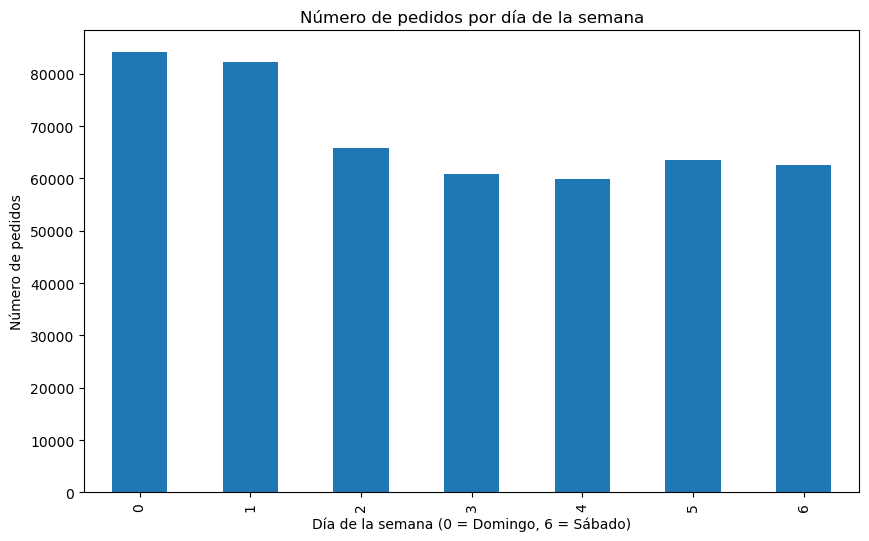

In [431]:
pedidos_por_dia = orders_df['order_dow'].value_counts().sort_index()
pedidos_por_dia.plot(kind='bar', title='Número de pedidos por día de la semana', figsize=(10, 6), xlabel='Día de la semana (0 = Domingo, 6 = Sábado)', ylabel='Número de pedidos')
plt.show()


Escribe aquí tus conclusiones

Los días 0 (domingo) y 1 (lunes) tienen la mayor cantidad de pedidos.

Esto sugiere que mucha gente hace sus compras al final o inicio de la semana.

Hay una caída notable en el número de pedidos desde el martes (2) hasta el jueves (4).

Los días 5 (viernes) y 6 (sábado) muestran un ligero aumento respecto al miércoles o jueves, pero no llegan a los niveles de domingo o lunes.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

0.0
30.0


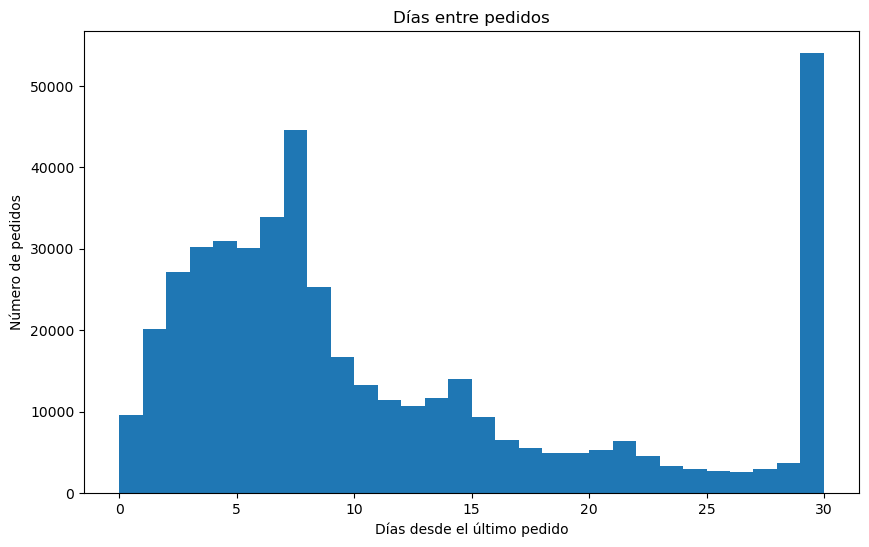

In [432]:
print(orders_df['days_since_prior_order'].min())
print(orders_df['days_since_prior_order'].max())
dias_espera = orders_df['days_since_prior_order'].dropna()
dias_espera.plot(kind='hist', bins=30, title='Días entre pedidos', figsize=(10, 6), xlabel='Días desde el último pedido', ylabel='Número de pedidos')
plt.show()

Escribe aquí tus conclusiones

El pico más alto del histograma está en 30 días, lo cual indica que muchos usuarios hacen compras mensuales.

Esto puede deberse a patrones de pago (quincenal/mensual), reposición de despensa o suscripciones.

Hay picos importantes entre 5 y 8 días, especialmente en el día 7, lo que indica que muchos usuarios compran semanalmente, probablemente los mismos días.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

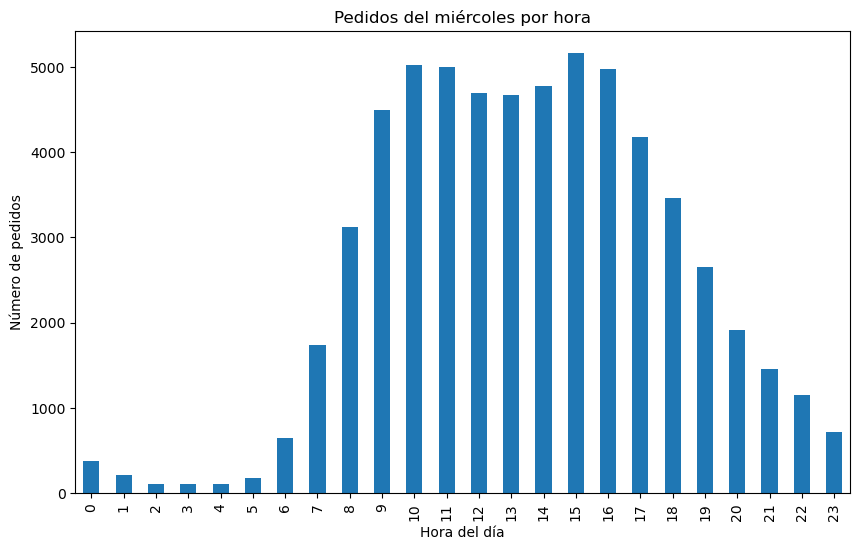

In [433]:
# 1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
miercoles = orders_df[orders_df['order_dow'] == 3]
pedidos_miercoles =miercoles['order_hour_of_day'].value_counts().sort_index()
pedidos_miercoles.plot(kind='bar', title='Pedidos del miércoles por hora', figsize=(10, 6), xlabel='Hora del día', ylabel='Número de pedidos')
plt.show()


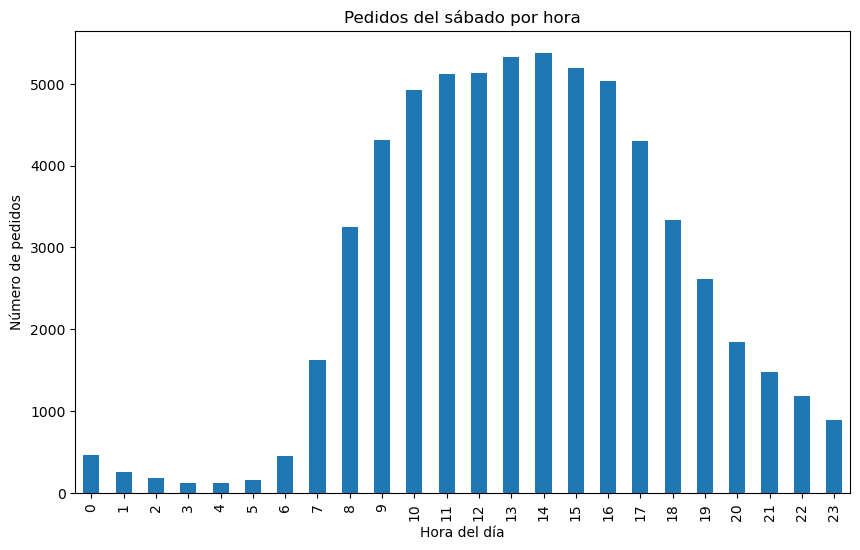

In [434]:
sabado = orders_df[orders_df['order_dow'] == 6]
pedidos_sabado = sabado['order_hour_of_day'].value_counts().sort_index()
pedidos_sabado.plot(kind='bar', title='Pedidos del sábado por hora', figsize=(10, 6), xlabel='Hora del día', ylabel='Número de pedidos')
plt.show()


Escribe aquí tus conclusiones

Miércoles: tiene una concentración más marcada, especialmente en la mañana, lo que sugiere que los usuarios hacen pedidos dentro de horarios laborales o de oficina, en especial entre las 9 am hasta las 16 hrs.

Sábado: muestra una distribución más dispersa durante todo el día. Hay más pedidos en la tarde, lo que sugiere mayor disponibilidad de tiempo (día no laboral para muchos). El pico más alto de ventas empieza desde las 9 am hasta las 17 hrs.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

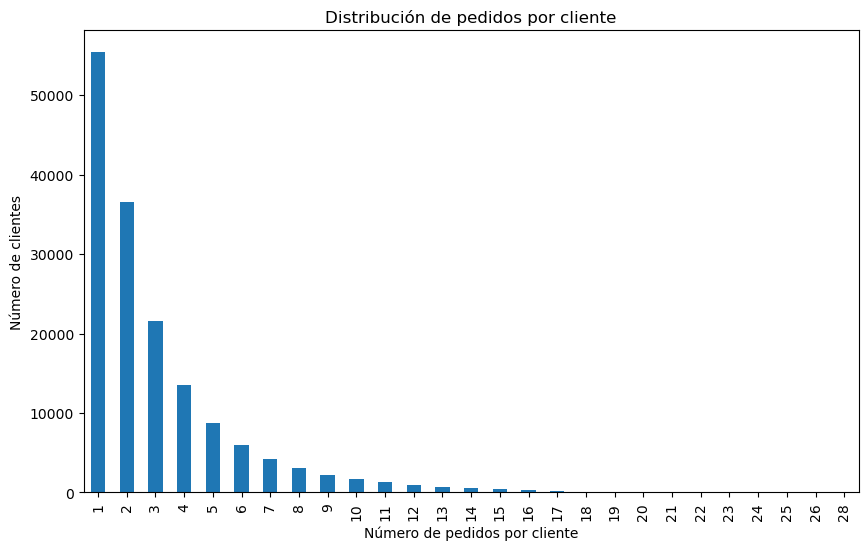

In [435]:
# 2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
pedidos_por_cliente = orders_df['user_id'].value_counts()
distribucion_pedidos = pedidos_por_cliente.value_counts().sort_index()
distribucion_pedidos.plot(kind='bar', title='Distribución de pedidos por cliente', figsize=(10, 6), xlabel='Número de pedidos por cliente', ylabel='Número de clientes')
plt.show()

Escribe aquí tus conclusiones

En la Distribución de pedidos por cliente, muchos clientes han hecho solo 1 pedido, lo que podría indicar que probaron el servicio una vez y de ahí va bajando. También se nota que hay un grupo fiel de clientes llegando hasta la cantidad de 17 pedidos.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [436]:
#3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?
top_productos = order_products_df['product_id'].value_counts().head(20)
top_productos_df = top_productos.reset_index()
top_productos_df.columns = ['product_id', 'cantidad_pedidos']
top_productos_con_nombres = top_productos_df.merge(products_df[['product_id', 'product_name']], on='product_id', how='left')
print(top_productos_con_nombres)

    product_id  cantidad_pedidos              product_name
0        24852             66050                    Banana
1        13176             53297    Bag of Organic Bananas
2        21137             37039      Organic Strawberries
3        21903             33971      Organic Baby Spinach
4        47209             29773      Organic Hass Avocado
5        47766             24689           Organic Avocado
6        47626             21495               Large Lemon
7        16797             20018              Strawberries
8        26209             19690                     Limes
9        27845             19600        Organic Whole Milk
10       27966             19197       Organic Raspberries
11       22935             15898      Organic Yellow Onion
12       24964             15292            Organic Garlic
13       45007             14584          Organic Zucchini
14       39275             13879       Organic Blueberries
15       49683             13675            Cucumber Kir

Escribe aquí tus conclusiones

En los 20 productos más frecuentes los más pedidos son alimentos básicos, como bananas, fresas orgánicas, aguacates, etc. Los clientes usan la plataforma de Instacart para compras de supermercado.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [437]:
productos_por_pedido = order_products_df.groupby('order_id')['product_id'].count()

In [438]:
print(productos_por_pedido.describe())

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


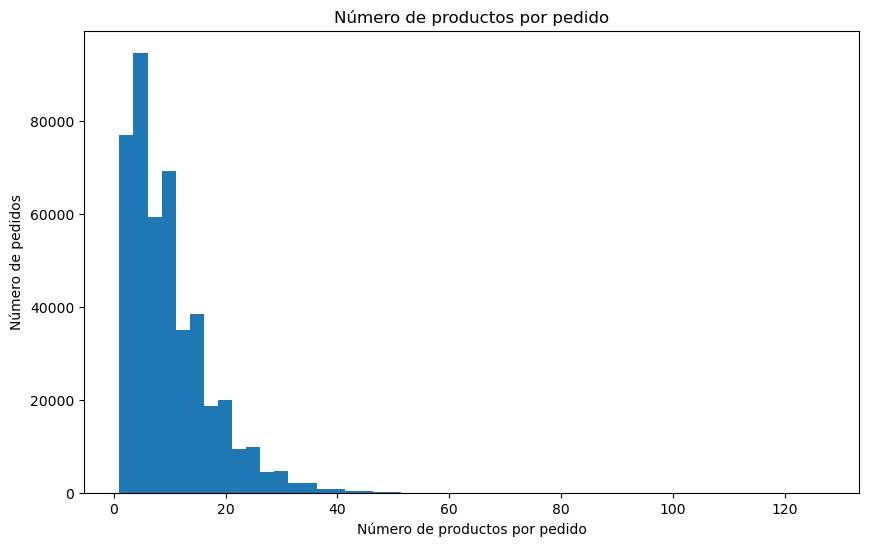

In [439]:
productos_por_pedido.plot(kind='hist', bins=50, title='Número de productos por pedido', figsize=(10, 6), xlabel='Número de productos por pedido', ylabel='Número de pedidos')
plt.show()

Escribe aquí tus conclusiones

Por la gráfica representa cuantos artículos compran las personas por pedido, el número de productos por pedido el pico más alto está entre 1 a 15 productos por pedidos ya que el máximo es de 127 mil pedidos.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [440]:
productos_reordenados = order_products_df[order_products_df['reordered'] == 1]


In [441]:
top_reordenados = productos_reordenados['product_id'].value_counts().head(20)

In [442]:
top_reordenados_df = top_reordenados.reset_index()
top_reordenados_df.columns = ['product_id', 'veces_reordenado']

In [443]:
top_reordenados_df = top_reordenados_df.merge(products_df[['product_id', 'product_name']], on='product_id', how='left')
print(top_reordenados_df)

    product_id  veces_reordenado              product_name
0        24852             55763                    Banana
1        13176             44450    Bag of Organic Bananas
2        21137             28639      Organic Strawberries
3        21903             26233      Organic Baby Spinach
4        47209             23629      Organic Hass Avocado
5        47766             18743           Organic Avocado
6        27845             16251        Organic Whole Milk
7        47626             15044               Large Lemon
8        27966             14748       Organic Raspberries
9        16797             13945              Strawberries
10       26209             13327                     Limes
11       22935             11145      Organic Yellow Onion
12       24964             10411            Organic Garlic
13       45007             10076          Organic Zucchini
14       49683              9538            Cucumber Kirby
15       28204              8989        Organic Fuji App

Escribe aquí tus conclusiones

Frutas y verduras frescas como bananas, fresas, aguacates, limones, manzanas y cebollas aparecen constantemente en la lista.

La mayoria de los productos tienen la palabra Organic.

El rango de productos más reordenados estan entre 8000 y más de 50000 como la banana, hay mucha fidelidad de clientes en estos productos.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [444]:
total_pedidos = order_products_df.groupby('product_id')['reordered'].count()

In [445]:
total_reordenados = order_products_df.groupby('product_id')['reordered'].sum()

In [446]:
proporcion_reordenado = (total_reordenados / total_pedidos).reset_index()
proporcion_reordenado.columns = ['product_id', 'proporcion_reordenado']
print(proporcion_reordenado)

       product_id  proporcion_reordenado
0               1               0.564286
1               2               0.000000
2               3               0.738095
3               4               0.510204
4               7               0.500000
...           ...                    ...
45568       49690               0.800000
45569       49691               0.430556
45570       49692               0.416667
45571       49693               0.440000
45572       49694               0.333333

[45573 rows x 2 columns]


Escribe aquí tus conclusiones

Productos con proporciones como 0.8, 0.9, incluso 1.0, significan que casi siempre que se compran, se vuelven a comprar.

product_id = 2 tiene 0.0, lo que significa que nunca ha sido reordenado. Podría ser porque es un producto que no ha sido reordenado, no gustó el producto

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [447]:
merged_df = order_products_df.merge(orders_df[['order_id', 'user_id']], on='order_id', how='left')
total_por_usuario = merged_df.groupby('user_id')['product_id'].count()

In [448]:
reordenados_por_usuario = merged_df[merged_df['reordered'] == 1].groupby('user_id')['product_id'].count()
proporcion_usuario = (reordenados_por_usuario / total_por_usuario).fillna(0).reset_index()
proporcion_usuario.columns = ['user_id', 'proporcion_reordenado']
print(proporcion_usuario)

        user_id  proporcion_reordenado
0             2               0.038462
1             4               0.000000
2             5               0.666667
3             6               0.000000
4             7               0.928571
...         ...                    ...
149621   206203               0.222222
149622   206206               0.714286
149623   206207               0.891304
149624   206208               0.696000
149625   206209               0.320000

[149626 rows x 2 columns]


Escribe aquí tus conclusiones

Hay usuarios con proporciones cercanas a 0, como el user_id = 4 o user_id = 6, lo cual sugiere que compran productos nuevos o diferentes casi siempre.

Otros como user_id = 7 o user_id = 206207 tienen una proporción muy alta 0.9, lo que indica que casi siempre compran productos que ya conocen.



### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [449]:
primeros_productos = order_products_df[order_products_df['add_to_cart_order'] == 1]

In [450]:
primeros_contados = primeros_productos['product_id'].value_counts().head(20).reset_index()
primeros_contados.columns = ['product_id', 'veces_agregado_primero']

In [451]:
top_primeros = primeros_contados.merge(products_df[['product_id', 'product_name']], on='product_id', how='left')
print(top_primeros)

    product_id  veces_agregado_primero                 product_name
0        24852                   15562                       Banana
1        13176                   11026       Bag of Organic Bananas
2        27845                    4363           Organic Whole Milk
3        21137                    3946         Organic Strawberries
4        47209                    3390         Organic Hass Avocado
5        21903                    3336         Organic Baby Spinach
6        47766                    3044              Organic Avocado
7        19660                    2336                 Spring Water
8        16797                    2308                 Strawberries
9        27966                    2024          Organic Raspberries
10       44632                    1914   Sparkling Water Grapefruit
11       49235                    1797          Organic Half & Half
12       47626                    1737                  Large Lemon
13         196                    1733          

Escribe aquí tus conclusiones

Banana, Organic Bananas, Strawberries, Avocados, Milk son los productos mas agregados en el carrito.

Los primeros productos en el carrito revelan que los clientes comienzan con productos frescos, saludables y esenciales.

### Conclusion general del proyecto:

En conclusión este proyecto ha sido muy desafiante y aún asi no se si está correcto, tuvw que usar la información de matplolib para las gráficas, pero lo que me costó más trabajo fue encontrar las variables de las preguntas en la sección C, espero seguir estudiando más de estos temas y aprender mucho más.